<a href="https://colab.research.google.com/github/rohit-anan/Deep-learning-projects/blob/main/Neural_Networks_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **REGRESSION IN NEURAL NETWORKS**

* ## PREDICTING HOUSE PRICES

### 1. The Boston housing price dataset

Aim is to predict the median price of homes in a given Boston suburbin the mid 1970s.

1.a. Loading the dataset.

In [ ]:
from tensorflow.keras.datasets import boston_housing

In [ ]:
(train_data,train_targets),(test_data,test_targets) = (boston_housing.load_data())

57026/57026 [==============================] - 0s 0us/step


In [ ]:
print(f"shape of train data:{train_data.shape}")
print(f"shape of test data:{test_data.shape}")

shape of train data:(404, 13)
shape of test data:(102, 13)


There are 404 training samples and 102 testing samples. And, there are 13 features susch as avg number of rooms, per capita crime rate etc.


In [ ]:
print(train_targets[10:20])

[12.1 17.9 23.1 19.9 15.7  8.8 50.  22.5 24.1 27.5]


Targets are median price values in the unit thousands of dollars.

### 2. Preparing the data

We need to normalize the data as many features have different scale. Some are binary whereas some take values between 0 and 100 and so on.

In [ ]:
mean = train_data.mean(axis=0)
train_data -=mean    # subtracting mean value from training data
std = train_data.std(axis=0)
train_data /= std    # dividing the training data by standard deviation
test_data -= mean    # subtracting the mean value from test data
test_data /= std     # dividing the test data by standard deviation

### 3. Building the model

In [ ]:
from tensorflow import keras
from keras import layers

In [ ]:
def build_model():
    model =keras.Sequential([
        layers.Dense(64,activation="relu"),
        layers.Dense(64,activation="relu"),
        layers.Dense(1)])
    model.compile(
    optimizer = "rmsprop",
    loss = "mse",
    metrics = ["mae"])   # mae = mean absolute error
    return model

### 4. Validating our approach using K-fold Validation

In [ ]:
k = 4
num_val_samples  = len(train_data)//4
num_epochs = 100
all_scores = []

In [ ]:
import numpy as np
for i in range(k):
  print(f"Processing fold #{i}")
  val_data = train_data[i*num_val_samples:(i+1)*num_val_samples]
  val_targets = train_targets[i*num_val_samples:(i+1)*num_val_samples]
  partial_train_data = np.concatenate(
      [train_data[:i*num_val_samples],
       train_data[(i+1)*num_val_samples:]],axis=0)
  partial_train_targets = np.concatenate(
      [train_targets[:i*num_val_samples],
       train_targets[(i+1)*num_val_samples:]],axis=0)
  model = build_model()
  model.fit(partial_train_data,partial_train_targets,
            epochs=num_epochs,batch_size=16,verbose=0)
  val_mse,val_mae = model.evaluate(val_data,val_targets,verbose=0)
  all_scores.append(val_mae)



Processing fold #0
Processing fold #1
Processing fold #2
Processing fold #3


Running this with num_epochs=100 yields the following results:

In [ ]:
all_scores

[1.9913972616195679, 2.492729425430298, 2.5155422687530518, 2.418088436126709]

In [ ]:
np.mean(all_scores)

2.3544393479824066

Our mean validation score is 2.6, which means we are off by 2600 dollars on average. This is significant considering the price range from 10,000 to 50,000 dollars.

Let's try training the model for a bit longer: 500 epochs. To keep a record of how well our model is doing at each epoch, we will modify the training loop to save the pre-epoch validation score log for each fold.

In [ ]:
num_epochs = 500
all_mae_histories = []

In [ ]:
for i in range(k):
  print(f"Processing fold #{i}")
  val_data = train_data[i*num_val_samples:(i+1)*num_val_samples]
  val_targets = train_targets[i*num_val_samples:(i+1)*num_val_samples]
  partial_train_data = np.concatenate(
      [train_data[:i*num_val_samples],
       train_data[(i+1)*num_val_samples:]],axis=0)
  partial_train_targets = np.concatenate(
      [train_targets[:i*num_val_samples],
       train_targets[(i+1)*num_val_samples:]],axis=0)
  model = build_model()
  history = model.fit(partial_train_data,partial_train_targets,
                      validation_data=(val_data,val_targets),
                      epochs=num_epochs,batch_size=16,verbose=0)
  mae_history = history.history["val_mae"]
  all_mae_histories.append(mae_history)

Processing fold #0
Processing fold #1
Processing fold #2
Processing fold #3


### 5. Building the history of successive mean K-Fold validation scores

In [ ]:
average_mae_history = [
    np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)
]

In [ ]:
print([average_mae_history])

[[19.271613597869873, 15.625232934951782, 11.521665096282959, 8.099924802780151, 6.057532787322998, 4.972690761089325, 4.33033150434494, 3.8886255025863647, 3.6342211961746216, 3.4435648918151855, 3.2346444725990295, 3.1100971698760986, 3.061825215816498, 2.974636733531952, 2.8421639800071716, 2.7972033619880676, 2.858072817325592, 2.70168536901474, 2.690288722515106, 2.682433009147644, 2.6243815422058105, 2.6602394580841064, 2.591270089149475, 2.60904598236084, 2.6092246770858765, 2.6085658073425293, 2.57853364944458, 2.5274786949157715, 2.5444095134735107, 2.535450577735901, 2.491440713405609, 2.5266069769859314, 2.5524415969848633, 2.453842282295227, 2.560654640197754, 2.4598787426948547, 2.4959110021591187, 2.5070191025733948, 2.4969992637634277, 2.4910370111465454, 2.462271749973297, 2.429797053337097, 2.4463041722774506, 2.4483895301818848, 2.476727068424225, 2.4932185411453247, 2.447552263736725, 2.406021296977997, 2.4504743218421936, 2.463983327150345, 2.4248254895210266, 2.418

### 6. Plotting the validation scores

In [ ]:
import matplotlib.pyplot as plt


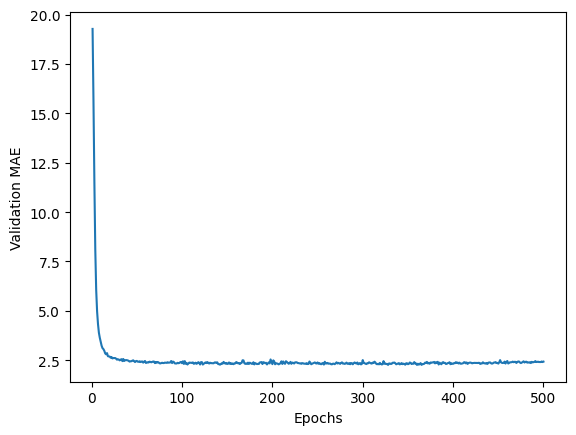

In [ ]:
plt.plot(range(1,len(average_mae_history)+1),average_mae_history)
plt.xlabel("Epochs")
plt.ylabel("Validation MAE")
plt.show()

It may be difficult to read the plot due to scaling issues as for the first few epochs validation MAE is dramatically higher. Let us omit the first 10 data points.

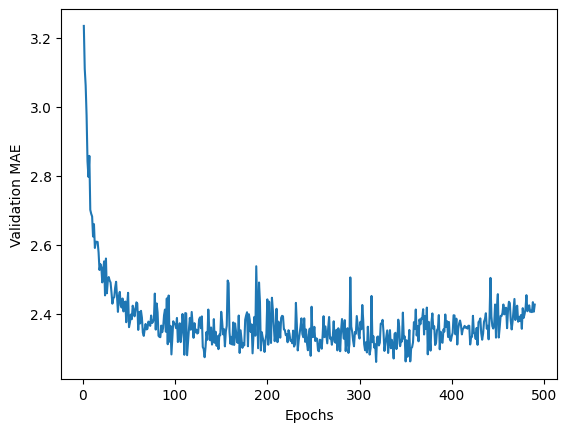

In [ ]:
trun_mae_history = average_mae_history[10:]
plt.plot(range(1,len(trun_mae_history)+1),trun_mae_history)
plt.xlabel("Epochs")
plt.ylabel("Validation MAE")
plt.show()


### 7. Training the final model

In [ ]:
model = build_model()
model.fit(train_data,train_targets,epochs=130,batch_size=16,verbose=0)
test_mse_score,test_mae_score = model.evaluate(test_data,test_targets)

4/4 [==============================] - 0s 5ms/step - loss: 17.0949 - mae: 2.6169


In [ ]:
print([test_mae_score])

[2.6169378757476807]


Our model is still off by $2600. So there is not much improvement.

### 8. Generating predicitions on new data

In [ ]:
predicitions = model.predict(test_data)
predicitions[0]

4/4 [==============================] - 0s 6ms/step


array([9.067994], dtype=float32)

The first house in the test set is predicted to have a price of about $9000.